In [43]:
#Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import plotly.graph_objs as go
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)

In [2]:
# Glossary
# Ecological Footprint per capita is a nation's total Ecological Footprint divided by the total population of the nation
# The EF consumption (in gha) includes the area needed to produce the materials consumed and the area needed to absorb the carbon dioxide emissions. 
# Biocapacity of an area is calculated by multiplying the actual physical area by the yield factor and the appropriate equivalence factor.The capacity of ecosystems to regenerate what people demand from those surfaces. Life, including human life, competes for space.
# EF Production Per Captia is the sum of the Footprints for all of the resources harvested and all of the waste generated within the defined geographical region divided by the total population of the nation.
# The carbon Footprint measures CO2 emissions associated with fossil fuel use. In Ecological Footprint accounts, these amounts are converted into biologically productive areas necessary for absorbing this CO2.

In [3]:
# Import 196 countries Ecological Footprint for data years 1961 through 2014, 
df=pd.read_csv('CarbonFootprint_2018.csv')
df.head()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000


In [4]:
df.describe()

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
count,87020.000000,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,8.702000e+04,71410.000000,8.702000e+04
mean,1989.193059,1.465068e+07,6.324612e+06,1.531334e+07,3.576364e+06,1.311909e+06,2.591459e+07,5.217695e+07,10129.722779,6.305956e+07
std,15.490923,1.445766e+08,6.237420e+07,1.798437e+08,3.905889e+07,1.448057e+07,3.448775e+08,5.890184e+08,15646.206882,4.264394e+08
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.150000e-05,115.794000,5.000000e+03
25%,1976.000000,3.027605e-01,7.470049e-02,1.508091e-01,3.252735e-02,0.000000e+00,1.946352e-02,1.313131e+00,988.470000,2.001000e+06
50%,1990.000000,2.841671e+00,2.526463e+00,3.110603e+00,3.670478e+00,3.247780e-02,1.293047e+00,1.858845e+02,3153.740000,6.632500e+06
75%,2003.000000,2.027347e+06,6.580112e+05,1.497303e+06,2.436509e+05,5.794159e+04,9.168465e+05,7.792829e+06,11972.100000,2.056300e+07
max,2014.000000,3.996304e+09,1.576582e+09,5.496461e+09,1.127790e+09,4.649979e+08,1.251963e+10,2.060191e+10,113682.000000,7.265786e+09


In [5]:
 # number of missing values in each column
df.apply(lambda x: sum(x.isnull()),axis=0)

country                         0
ISO alpha-3 code             1360
UN_region                       0
UN_subregion                    0
year                            0
record                          0
crop_land                   23490
grazing_land                23490
forest_land                 23490
fishing_ground              23490
built_up_land               23490
carbon                      23490
total                           0
Percapita GDP (2010 USD)    15610
population                      0
dtype: int64

In [6]:
# How many countries data is present
np.count_nonzero(df.country.unique())

196

In [7]:
# Rename the column Total to Total_Area
df.rename(columns={'total':'Total_Area'}, inplace=True)
df.sample()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,Total_Area,Percapita GDP (2010 USD),population
23516,Estonia,EST,Europe,Northern Europe,2009,EFImportsPerCap,0.666077,0.089898,0.75413,0.224732,0.0,2.344773,4.07961,14282.6,1336000


In [8]:
#check which rows has null values for Condition columns 
df[df.carbon.isnull()]

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,Total_Area,Percapita GDP (2010 USD),population
1310,Algeria,DZA,Africa,Northern Africa,1961,BiocapPerCap,NaN,NaN,NaN,NaN,NaN,NaN,1.445786e+00,2078.22,11405000
1311,Algeria,DZA,Africa,Northern Africa,1961,BiocapTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,1.648904e+07,2078.22,11405000
1312,Algeria,DZA,Africa,Northern Africa,1961,EFConsPerCap,NaN,NaN,NaN,NaN,NaN,NaN,7.360894e-01,2078.22,11405000
1313,Algeria,DZA,Africa,Northern Africa,1961,EFConsTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,8.395027e+06,2078.22,11405000
1314,Algeria,DZA,Africa,Northern Africa,1961,EFExportsPerCap,NaN,NaN,NaN,NaN,NaN,NaN,1.472014e-01,2078.22,11405000
1315,Algeria,DZA,Africa,Northern Africa,1961,EFExportsTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,1.678818e+06,2078.22,11405000
1316,Algeria,DZA,Africa,Northern Africa,1961,EFImportsPerCap,NaN,NaN,NaN,NaN,NaN,NaN,2.828812e-01,2078.22,11405000
1317,Algeria,DZA,Africa,Northern Africa,1961,EFImportsTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,3.226232e+06,2078.22,11405000
1318,Algeria,DZA,Africa,Northern Africa,1961,EFProdPerCap,NaN,NaN,NaN,NaN,NaN,NaN,6.004097e-01,2078.22,11405000
1319,Algeria,DZA,Africa,Northern Africa,1961,EFProdTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,6.847613e+06,2078.22,11405000


In [9]:
# drop only the rows with minimum 7 column with NA values, doing this so that world data does not drop.
df_world=df.dropna(thresh=7)
df_clean=df.dropna()
df_clean[df_clean.carbon.isnull()]

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,Total_Area,Percapita GDP (2010 USD),population


In [10]:
df_clean.describe()

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,Total_Area,Percapita GDP (2010 USD),population
count,54330.000000,5.433000e+04,5.433000e+04,5.433000e+04,5.433000e+04,5.433000e+04,5.433000e+04,5.433000e+04,54330.000000,5.433000e+04
mean,1991.150745,7.744275e+06,3.204618e+06,8.116228e+06,2.042132e+06,7.931547e+05,1.474430e+07,3.664470e+07,11043.275472,4.356898e+07
std,15.168254,3.733184e+07,1.487819e+07,5.548825e+07,9.433126e+06,6.137841e+06,1.103329e+08,1.853537e+08,16428.456071,1.434889e+08
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.515768e-03,115.794000,1.130000e+05
25%,1979.000000,3.151253e-01,8.072040e-02,1.799788e-01,3.551980e-02,0.000000e+00,2.438768e-02,1.373126e+00,776.843000,3.570000e+06
50%,1993.000000,3.446406e+00,2.989496e+00,4.193340e+00,4.184065e+00,3.412537e-02,1.475490e+00,3.681368e+03,2970.040000,9.087000e+06
75%,2004.000000,2.297903e+06,7.008065e+05,1.742550e+06,3.260079e+05,6.285169e+04,1.193828e+06,1.174223e+07,15786.300000,2.810600e+07
max,2014.000000,8.148728e+08,2.022626e+08,1.495331e+09,1.731391e+08,1.715442e+08,3.688446e+09,5.212416e+09,113682.000000,1.400602e+09


In [11]:
# check the data where carbon footprint is 0, if that is valid data
df_clean[df_clean['carbon']==0]
df_clean.sample()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,Total_Area,Percapita GDP (2010 USD),population
13707,Sri Lanka,LKA,Asia,Southern Asia,2010,EFImportsTotGHA,2510539.295,186595.616,1192341.605,646024.2477,0.0,4953298.746,9488799.51,2819.51,20201000


In [12]:
years=np.sort(df_clean.year.unique()) # take unique years from the dataset
Countries=np.sort(df_clean.country.unique()) # take unique countries name from the dataset
#len(Countries) # check how many countries by using len function
ctry_df = pd.DataFrame() # create a country dataframe which has data of only valid countries which is in list
for country in Countries:
    ctry_df=ctry_df.append(df_clean[df_clean.country.isin([country])])
ctry_df.head()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,Total_Area,Percapita GDP (2010 USD),population
640,Afghanistan,AFG,Asia,Southern Asia,2002,BiocapPerCap,2.339556e-01,2.779518e-01,2.896579e-02,0.000000,0.029718,0.000000,5.705912e-01,364.571,21487000
641,Afghanistan,AFG,Asia,Southern Asia,2002,BiocapTotGHA,5.027028e+06,5.972377e+06,6.223908e+05,0.000000,638553.774200,0.000000,1.226035e+07,364.571,21487000
642,Afghanistan,AFG,Asia,Southern Asia,2002,EFConsPerCap,3.003288e-01,2.430369e-01,8.596299e-02,0.000078,0.029718,0.044937,7.040609e-01,364.571,21487000
643,Afghanistan,AFG,Asia,Southern Asia,2002,EFConsTotGHA,6.453194e+06,5.222158e+06,1.847095e+06,1668.497418,638553.774200,965557.749700,1.512823e+07,364.571,21487000
644,Afghanistan,AFG,Asia,Southern Asia,2002,EFExportsPerCap,4.085966e-03,2.879840e-04,3.401990e-04,0.000000,0.000000,0.002610,7.324514e-03,364.571,21487000


In [13]:
country_foot_print=ctry_df[ctry_df.country.isin(Countries)]
#country_foot_print.sample()
country_by_record = country_foot_print [country_foot_print['record']=="BiocapPerCap"]
country_by_record.sample()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,Total_Area,Percapita GDP (2010 USD),population
37640,Côte d'Ivoire,CIV,Africa,Western Africa,2007,BiocapPerCap,0.796919,0.615195,0.505355,0.043898,0.06653,0.0,2.027896,1207.09,18862000


In [14]:
Countries[158] # checking the country name by passing the index to countries array

'Yemen'

In [15]:
# this functionn will return the dataframe depending on the record value and matching countries list
def country_record(df,country_name,record):
    country_foot_print=df[df.country.isin([country_name])]
    country_by_record = country_foot_print [country_foot_print.record.isin([record])]
    return country_by_record

# this functionn will return the population along with the countries depending on the record value 
def countries_popu_by_year (df,countries_list,popul,year,record="BiocapPerCap"):
    population_values=[]
    countries=[]
    excluded_countries=[]
    for i in range (0,len(countries_list)):
        country_popu = country_record(df,countries_list[i],record)
        popul_value = country_popu.loc[lambda df1: country_popu.year == year][popul].values
        if  popul_value.size==0 or math.isnan(popul_value[0]) :
            excluded_countries.append(countries_list[i])
        else:
            population_values.append(popul_value[0])
            countries.append(countries_list[i])            
    return population_values,countries,excluded_countries

In [16]:
#checking how many records satisfies the condition
len(country_by_record.loc[lambda df1: country_by_record.year == 2010]['population'].values)

129

In [17]:
#checking the 'countries_popu_by_year' function code if working fine for 2010 year
population_values=[]
countries=[]
excluded_countries=[]
for i in range(len(Countries)):
    country_popu = country_record(ctry_df,Countries[i],record="BiocapPerCap")
    popul_value = country_popu.loc[lambda df1: country_popu.year == 2010]['population'].values
    if  popul_value.size==0 or math.isnan(popul_value[0]) :
        excluded_countries.append(Countries[i])
    else:
        population_values.append(popul_value[0])
print(population_values)   

[27962000, 2902000, 21220000, 41223000, 2963000, 22163000, 8392000, 9100000, 361000, 1261000, 151617000, 280000, 9492000, 10930000, 9510000, 720000, 9918000, 3835000, 198614000, 393000, 15632000, 9461000, 20591000, 34126000, 4445000, 11896000, 17015000, 1371697000, 45918000, 4066000, 65939000, 4545000, 4316000, 11308000, 10507000, 20132000, 5551000, 9898000, 6038000, 729000, 4690000, 1332000, 87562000, 860000, 62998000, 1693000, 4250000, 80435000, 24318000, 11178000, 11012000, 1634000, 753000, 10000000, 1230984000, 241613000, 4617000, 7420000, 59619000, 127320000, 6518000, 16311000, 40328000, 49090000, 3059000, 6261000, 2091000, 4337000, 2011000, 3958000, 6266000, 3123000, 508000, 2062000, 21080000, 14770000, 28120000, 15167000, 412000, 118618000, 4084000, 622000, 24321000, 51733000, 26876000, 16632000, 4369000, 5738000, 16292000, 159425000, 4891000, 2944000, 170044000, 3621000, 6210000, 29374000, 93039000, 38575000, 10585000, 1766000, 20299000, 143158000, 10294000, 177000, 9059000, 57

The total Population of top 20 countries in 2014 according to the available data is: 5124853000


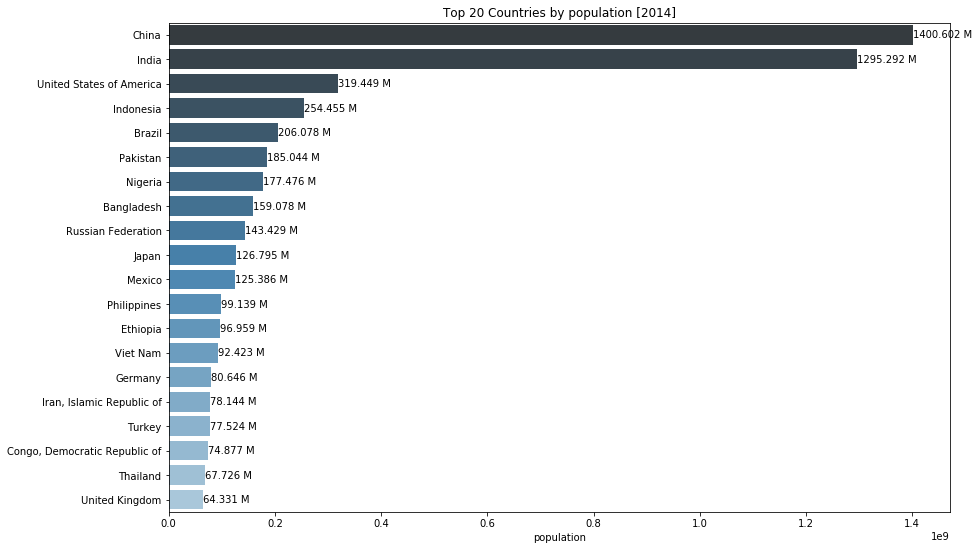

In [26]:
# Population of Top 20 countries in 2014 year.
fig = plt.figure(figsize=(14,9))
population,countries,countries_nodata=countries_popu_by_year(ctry_df,Countries,'population',2014)
population_df = pd.DataFrame({'country':countries,'population':population}).sort_values(by='population',ascending=False)
population_df = population_df.head(20)
popul_df_top10 = population_df.head(10)
population_list = list (population_df['population'])
ax = sns.barplot(population_df['population'],population_df['country'], palette="Blues_d")
population_list = list (np.array(population_df['population'])/10**6)
list_counter = 0
# annotating the values
for p in ax.patches:        
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[:,1]
    ax.annotate(str(population_list[list_counter])+" M" , (x.max()+500, y.mean()), 
                horizontalalignment='left',
                verticalalignment='center')
    list_counter += 1
plt.ylabel("")
plt.title("Top 20 Countries by population [2014]")

print ("The total Population of top 20 countries in 2014 according to the available data is: {0}".format(np.sum(population_df['population'])))

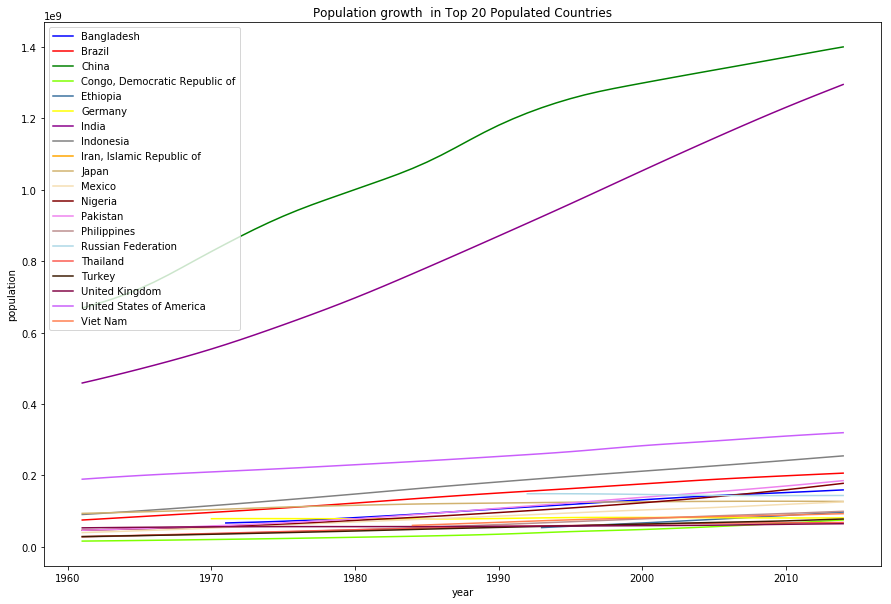

In [19]:
# Population growth of Top 20 populated countries
colors = ['blue','red','green','chartreuse',
          'xkcd:muted blue','yellow','darkmagenta','grey',
          'orange','xkcd:tan','wheat','maroon',
          'violet','rosybrown','lightblue',
          'xkcd:coral','xkcd:chocolate','xkcd:red purple',
          'xkcd:bright lilac','coral']
plt.figure(figsize=(15,10))
top_countries=np.sort(population_df.country.unique())
for i in range(len(top_countries)):
    country_by_record = country_record(ctry_df,top_countries[i],'BiocapPerCap')
    sns.lineplot(country_by_record['year'],country_by_record['population'],
             label=top_countries[i],
             color = colors[i])
    
plt.legend()
plt.title("Population growth  in Top 20 Populated Countries")
plt.show()

The total Population of bottom 20 countries in 2014 according to the available data is: 5124853000


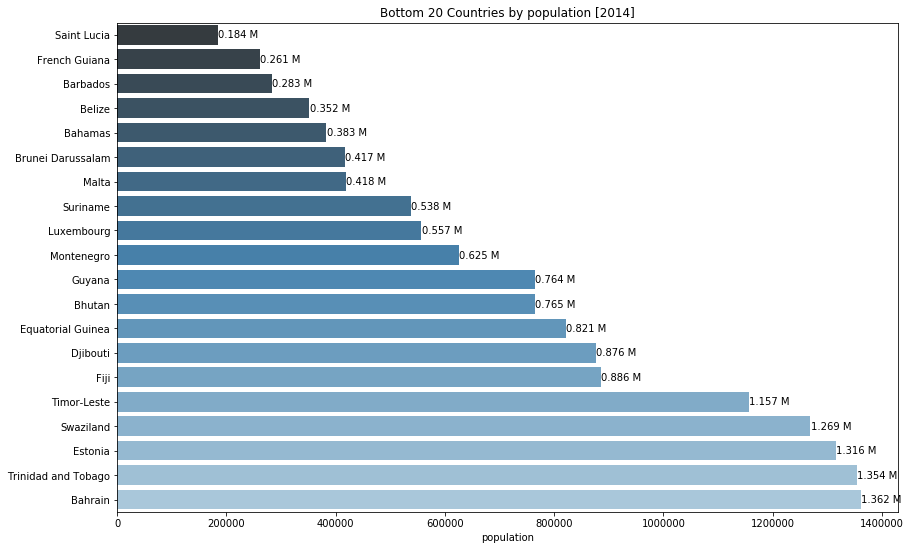

In [20]:
# Population of bottom 20 countries in 2014 year.
fig = plt.figure(figsize=(14,9))
population,countries,countries_nodata=countries_popu_by_year(ctry_df,Countries,'population',2014)
popul_bottom_df = pd.DataFrame({'country':countries,'population':population}).sort_values(by='population',ascending=True)
popul_bottom_df = popul_bottom_df.head(20)
population_list = list (popul_bottom_df['population'])
ax = sns.barplot(popul_bottom_df['population'],popul_bottom_df['country'], palette="Blues_d")
population_list = list (np.array(popul_bottom_df['population'])/10**6)
list_counter = 0
# annotating the values
for p in ax.patches:        
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[:,1]
    ax.annotate(str(population_list[list_counter])+" M" , (x.max()+500, y.mean()), 
                horizontalalignment='left',
                verticalalignment='center')
    list_counter += 1
plt.ylabel("")
plt.title("Bottom 20 Countries by population [2014]")

print ("The total Population of bottom 20 countries in 2014 according to the available data is: {0}".format(np.sum(population_df['population'])))

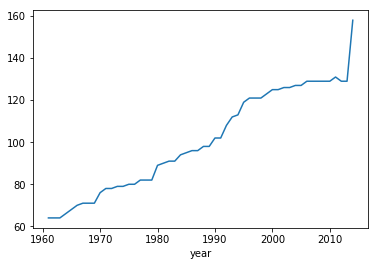

In [21]:
# count of countries in different years, from the data we can say that all countries data is not present in each year
ctry_cnt=ctry_df.loc[(ctry_df['record'] == "BiocapPerCap")].groupby(['year']) ['country'].count()
ctry_cnt.plot(kind='line')

In [22]:
Ctry_top_20=np.sort(population_df.country.unique())

popul_1990,ctry_1990,countr_nodata_1990=countries_popu_by_year(ctry_df,Ctry_top_20,'population',1990)
popul_2014,ctry_2014,countr_nodata_2010=countries_popu_by_year(ctry_df,Ctry_top_20,'population',2014)
top_populated_ctry=np.intersect1d(ctry_1990, ctry_2014)
print((ctry_1990))
print((ctry_2014))
print(top_populated_ctry)

['Bangladesh', 'Brazil', 'China', 'Congo, Democratic Republic of', 'Germany', 'India', 'Indonesia', 'Japan', 'Mexico', 'Nigeria', 'Pakistan', 'Philippines', 'Thailand', 'Turkey', 'United Kingdom', 'United States of America', 'Viet Nam']
['Bangladesh', 'Brazil', 'China', 'Congo, Democratic Republic of', 'Ethiopia', 'Germany', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Japan', 'Mexico', 'Nigeria', 'Pakistan', 'Philippines', 'Russian Federation', 'Thailand', 'Turkey', 'United Kingdom', 'United States of America', 'Viet Nam']
['Bangladesh' 'Brazil' 'China' 'Congo, Democratic Republic of' 'Germany'
 'India' 'Indonesia' 'Japan' 'Mexico' 'Nigeria' 'Pakistan' 'Philippines'
 'Thailand' 'Turkey' 'United Kingdom' 'United States of America'
 'Viet Nam']


Text(0.5, 1.0, '2014 Top Populated countries annual population growth rate from [1990-2014]')

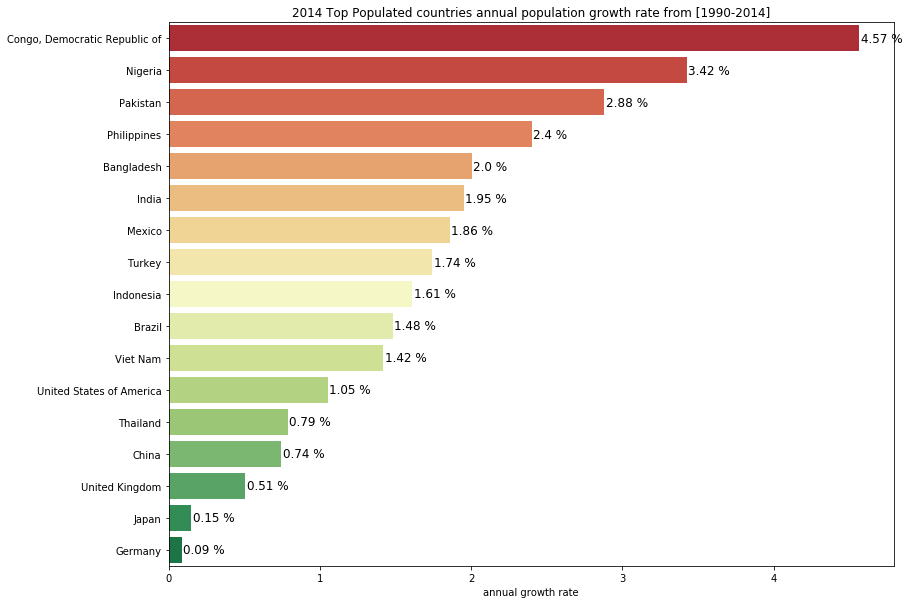

In [23]:
# Population growth rate of Top 20 populated countries of 2014

def popu_growth_rate(curr_year,first_year,period):
    #curr_year : current year , first_year: first year , period: number of years between current and first year
    perct_growth_rate = ((curr_year - first_year)/(first_year*period))*100
    return perct_growth_rate

popul_1990,ctry_1990,countr_nodata_1990=countries_popu_by_year(ctry_df,top_populated_ctry,'population',1990)
popul_2014,ctry_2014,countr_nodata_2010=countries_popu_by_year(ctry_df,top_populated_ctry,'population',2014)

population_growth_rate = []
for i in range (0,len(popul_1990)):
    growth_rate = popu_growth_rate(popul_2014[i],popul_1990[i],25)
    population_growth_rate.append(growth_rate)
growth_rate_df = pd.DataFrame({"country":top_populated_ctry,"growth rate":population_growth_rate}).sort_values(by="growth rate",ascending=False)

fig = plt.figure(figsize=(13,10))
ax = sns.barplot(growth_rate_df["growth rate"],growth_rate_df["country"],palette="RdYlGn")
growth_list = list(np.round(np.array(growth_rate_df["growth rate"]),2))
list_counter = 0
# annotating the values
for p in ax.patches:        
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[:,1]
    ax.annotate(str(growth_list[list_counter] )+ " %" , (x.max()+0.01, y.mean()), 
                horizontalalignment='left',
                verticalalignment='center',size=12)
    list_counter += 1
plt.xlabel("annual growth rate")
plt.ylabel("")
plt.title("2014 Top Populated countries annual population growth rate from [1990-2014]")

In [29]:
ctry_top10=np.sort(popul_df_top10.country.unique())
country_record(df_world,'World','BiocapPerCap').sample()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,Total_Area,Percapita GDP (2010 USD),population
85870,World,NaN,World,World,1978,BiocapPerCap,0.522406,0.349738,1.246386,0.258374,0.039265,0.0,2.41617,6118.39,4286282000


Text(0.5, 1.0, 'Percapita GDP for Top 10 Populated Contries')

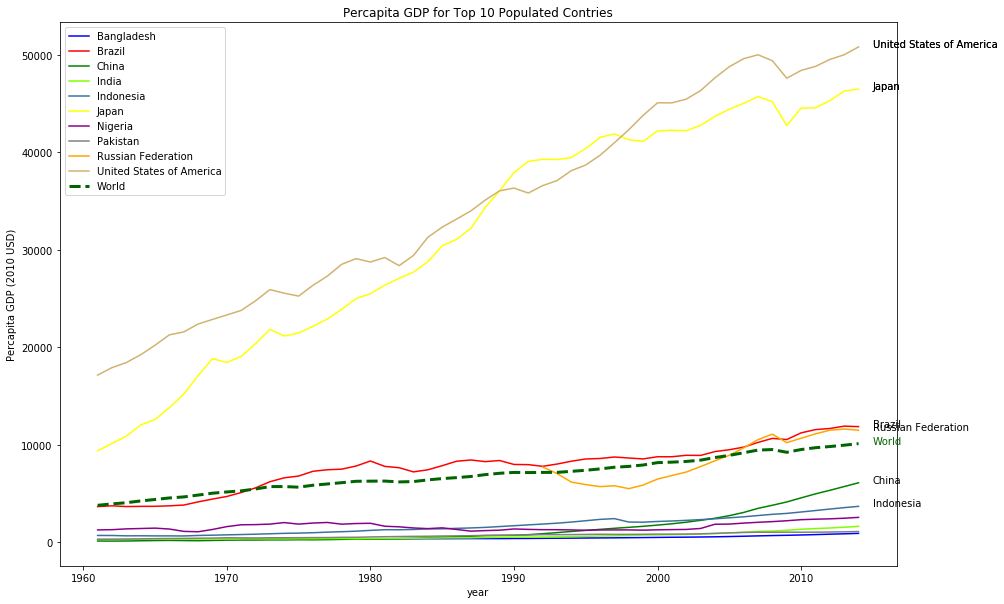

In [30]:
# comparision between world GDP and the 10 most populated country GDP 
plt.figure(figsize=(15,10))
GDP,countries,ctr_nodata=countries_popu_by_year(ctry_df,ctry_top10,'Percapita GDP (2010 USD)',2014)
GDP_df = pd.DataFrame({'country':countries,'GDP':GDP}).sort_values(by='GDP',ascending=False)
for i in range(len(ctry_top10)):
    country_by_record = country_record(ctry_df,ctry_top10[i],'BiocapPerCap')
    sns.lineplot(country_by_record['year'],
                 country_by_record['Percapita GDP (2010 USD)'], 
                 label=ctry_top10[i],color = colors[i])
    y_text_label = country_by_record.loc[lambda df: country_by_record.year == 2014]['Percapita GDP (2010 USD)'].values 
    if ctry_top10[i] in list(GDP_df.country[0:2]) and y_text_label.size!=0 and not math.isnan(y_text_label[0]) :
        plt.text(2015,y_text_label[0], ctry_top10[i])

    if ctry_top10[i] in list(GDP_df.country[0:6]) and y_text_label.size!=0 and not math.isnan(y_text_label[0]) :
        plt.text(2015,y_text_label[0], ctry_top10[i])
        
World_by_record = country_record(df_world,'World','BiocapPerCap')
ax = sns.lineplot(World_by_record['year'],World_by_record['Percapita GDP (2010 USD)'], 
             label='World',color = 'darkgreen',linewidth=3) 

ax.lines[10].set_linestyle("--")
plt.text(2015,World_by_record.loc[lambda df: World_by_record.year == 2014]['Percapita GDP (2010 USD)'].values [0],'World',color='darkgreen')
# plt.gca().set_color_cycle(colors)
plt.legend()
plt.title("Percapita GDP for Top 10 Populated Contries")

In [39]:
# The high the gap between the biocapacity and the EF consumption for biocapacity means that the country has the enough natural resources to cover its needs
# Top 10 GDP growth rate countries having relation between Biocapity and its consumption rate
GDP,countries,countries_nodata=countries_popu_by_year(df_clean,Countries,'Percapita GDP (2010 USD)',2010)
GDP_df = pd.DataFrame({'country':countries,'Percapita GDP':GDP}).sort_values(by='Percapita GDP',ascending=False)
GDP_df_top10 = GDP_df.head(10)
ctry_top10_GDP=np.sort(GDP_df_top10.country.unique())

top10_carbon,countries,countries_nodata=countries_popu_by_year(df_clean,ctry_top10_GDP,'carbon',2010,record="EFConsPerCap")
carbon_df = pd.DataFrame({'country':ctry_top10_GDP,'carbon':top10_carbon}).sort_values(by='carbon',ascending=False)


In [137]:
y = ctry_top10_GDP
x = countries_popu_by_year(df_clean,ctry_top10_GDP,'Percapita GDP (2010 USD)',2010)[0]
size = countries_popu_by_year(df_clean,ctry_top10_GDP,'carbon',2010,record="EFConsPerCap")[0]
colors = size
text = []
for i in range (len(ctry_top10_GDP)):
    text.append(y[i]+"<br>"+"GDP Percap: {0} K".format(np.round((x[i]/10**3),2))+"<br>"+"EFcarbon: {0} ".format(np.round((np.array(size)[i]),2)))

trace = go.Scatter(x=x,y=y,text = text,
                mode='markers',  hoverinfo = 'text ',
                name = "EFCarbon",  showlegend = False,
                marker={'size': size,'color': colors,'opacity': 0.6,'sizemode' : 'area','sizeref' : 0.005,
                        'colorscale': 'Portland', 'showscale' : True,'cmax' : np.max(size),'cmin' : np.min(size),
                         'colorbar' : dict( y= 0.52, len= .8,
                                            x = 1,
                                            title = "EF Carbon",
                                            titlefont = dict(size=15))
                       },
                  
                  );
layout = go.Layout(
                  title = "Ecological footprint of Carbon and GDP (per capita) [2010]",
                  xaxis=dict(title = "GDP (per capita)",
                             titlefont = dict (family = "Arial"),
                             zeroline=False),
                  yaxis=dict(
                        zeroline=True,
                        showticklabels=True,
                        tickfont=dict(family='Arial', size=12)),
                  margin=dict(
                        l=140,
                        r=20,
                        t=40,
                        b=45,),
                  width = 1000,
                  height = 700)
fig = go.Figure(data=[trace],layout = layout)
py.iplot(fig)

c:\users\ashu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

c:\users\ashu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Text(0.5, 1.0, 'Ecological Deficit/Reserve for Top and Bottom 5 countries (per capita)')

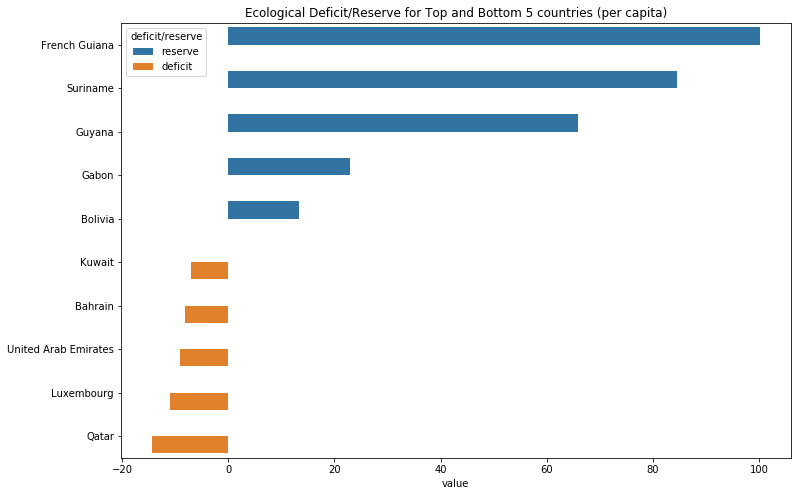

In [147]:
# Analysing the Deficit/Reserve values of Ecological footprint
difference  = []
countries_list = []
deficit_or_reserve = []
for country in Countries:
    BiocapPerCap=np.array(countries_popu_by_year(df_clean,[country],'Total_Area',2014)[0])
    EFConsPerCap=np.array(countries_popu_by_year(df_clean,[country],'Total_Area',2014,record="EFConsPerCap")[0])
    difference_value = BiocapPerCap - EFConsPerCap
    if difference_value < 0 :
        deficit_or_reserve.append ("deficit")
        difference.append(difference_value[0])
    if difference_value > 0 :
        deficit_or_reserve.append("reserve")
        difference.append(difference_value[0])
    if difference_value.size==0:
        deficit_or_reserve.append("nan")
        difference.append(np.NAN)
    countries_list.append(country)
defict_reserve_df = pd.DataFrame({"country":countries_list,"deficit/reserve":deficit_or_reserve,"value":difference}).dropna().sort_values(by="value",ascending=False)
#defict_reserve_df
top5_reserve=defict_reserve_df.head(5)
bottom5_defict=defict_reserve_df.tail(5)
df_res_def=top5_reserve.append(bottom5_defict)
#top5_reserve
#bottom5_defict
df_res_def
ctry_list=np.sort(df_res_def.country.unique())
#g = sns.FacetGrid(df_res_def, col="deficit/reserve", margin_titles=True, height=4)
#g.map(plt.scatter, "value", "country", color="#338844", edgecolor="white", s=50, lw=1)
#g.add_legend();
fig = plt.figure(figsize=(12,8))
sns.barplot(x=df_res_def["value"], y=df_res_def["country"],hue=df_res_def["deficit/reserve"])
plt.ylabel("")

plt.title("Ecological Deficit/Reserve for Top and Bottom 5 countries (per capita)")


In [136]:
y = ctry_list
x = df_res_def['value']
size = df_ctry_gdp['GDP_PerCap']
colors = size
    
trace = go.Scatter(x=x,y=y,mode='markers', 
                name = "EFCarbon",  showlegend = False,
                marker={'size': size,'color': colors,'opacity': 0.6,'sizemode' : 'area','sizeref' : 20,
                        'colorscale': 'YlOrRd', 'showscale' : True,'cmax' : np.max(size),'cmin' :np.min(size),
                         'colorbar' : dict( y= 0.52, len= 0.8, x = 1,title = "GDP Per Captia",titlefont = dict(size=15))
                       },
                  
                  );
layout = go.Layout(
                  title = "Ecological Reserve/Deficit and GDP (per capita) [2014]",
                  xaxis=dict(title = "Reserve/Deficit",
                             titlefont = dict (family = "Arial"),
                             zeroline=False),
                  yaxis=dict(
                        zeroline=True,
                        showticklabels=True,
                        tickfont=dict(family='Arial', size=12)),
                  margin=dict(
                        l=140,
                        r=20,
                        t=40,
                        b=45,),
                  width = 1000,
                  height = 700)
fig = go.Figure(data=[trace],layout = layout)
py.iplot(fig)

In [122]:
GDP_PerCap,Ctry_GDP,no_data = countries_popu_by_year(df_clean,ctry_list,'Percapita GDP (2010 USD)',2014)
df_ctry_gdp= pd.DataFrame({'country':Ctry_GDP,'GDP_PerCap':GDP_PerCap})
df_ctry_gdp
size = df_ctry_gdp['GDP_PerCap']
np.max(size)/100000

1.07153

In [ ]:
# Errors faced while doing handson
# 1. index 158 is out of bounds for axis 0 with size 158
# 2. arrays must all be same length
# 3. TypeError: tuple indices must be integers or slices, not str
# 4. IndentationError: unexpected indent